# First linear regression model
This notebook will illustrate the contents of the lecture 5.

In [106]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## Load the rent index data
The data stems from a rent index in Munich from 1999 and stems from the [Textbook of L. Fahrmeir et al.](https://link.springer.com/book/10.1007/978-3-642-01837-4).

In [107]:
mietspiegel = pd.read_table("data/mietspiegel99.raw")
print(mietspiegel.dtypes)
mietspiegel.head(5)
print(mietspiegel.shape)

miete      float64
mieteqm    float64
flaeche      int64
bjahr      float64
bad          int64
kueche       int64
bezv         int64
lage         int64
zh           int64
dtype: object
(3082, 9)


| Variable  | Description                       | Categories |
|-----------|-----------------------------------|------------|
|miete      |Net rent per month (in DM)         | *numeric* |
|mieteqm    |Net rent per square meter (in DM)  | *numeric* |
|flaeche    |Living area in square meter        | *numeric* |
|bjahr      |Year of construction (in years)    | *numeric* |
|lage       |Exposure of the dwelling            |1 = norm |  
|           |                                    |2 = g  d |
|           |                                    |3 = excellent |
|bad        |Furnishings in the bathroom         |0 = normal |
|           |                                    |1 = upper |
|kueche     |Furnishings in the kitchen         | 0 = normal |
|           |                                    |1 = upper |
|zh         |Central heating                     |0 = no |
|           |                                    |1 = yes |
|bez        |District in Munich                | *numeric* |
ich	(numeric)


## Some data preparations

In [108]:
mietspiegel.bjahr = mietspiegel.bjahr.astype(int)
#mietspiegel = mietspiegel[mietspiegel.bjahr <= 1995]
mietspiegel


,miete,mieteqm,flaeche,bjahr,bad,kueche,bezv,lage,zh
0,235.9,6.740000,35,1939,0,0,1112,1,0
1,852.1,8.193269,104,1939,1,0,1112,1,1
2,693.7,23.920690,29,1971,0,0,2114,2,1
3,551.7,14.146150,39,1972,0,0,2148,2,1
4,1574.1,16.227830,97,1985,0,0,2222,1,1
...,...,...,...,...,...,...,...,...,...
3077,1024.5,15.291050,67,1971,0,0,2148,2,1
3078,1389.6,16.742170,83,1918,0,0,341,2,0
3079,1624.8,14.770910,110,1918,1,0,961,2,1
3080,1086.8,26.507320,41,1972,0,0,381,2,1


## Descriptive analyses
We compute descriptive statistics for all variables and visualize the correlation of all variables

In [109]:
mietspiegel.describe()

,miete,mieteqm,flaeche,bjahr,bad,kueche,bezv,lage,zh
count,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000
mean,895.902498,13.866955,67.374757,1956.244971,0.061973,0.042505,1169.715769,1.443219,0.895847
std,381.530442,4.750216,23.720446,22.298381,0.241145,0.201771,677.849333,0.545425,0.305509
min,79.000000,0.810811,20.000000,1918.000000,0.000000,0.000000,113.000000,1.000000,0.000000
25%,627.950000,10.258868,51.000000,1939.000000,0.000000,0.000000,561.000000,1.000000,1.000000
50%,832.600000,13.611470,65.000000,1959.000000,0.000000,0.000000,1025.000000,1.000000,1.000000
75%,1090.750000,17.239607,81.000000,1972.000000,0.000000,0.000000,1714.000000,2.000000,1.000000
max,3594.600000,34.557140,160.000000,1997.000000,1.000000,1.000000,2529.000000,3.000000,1.000000


TypeError: 'int' object is not callable

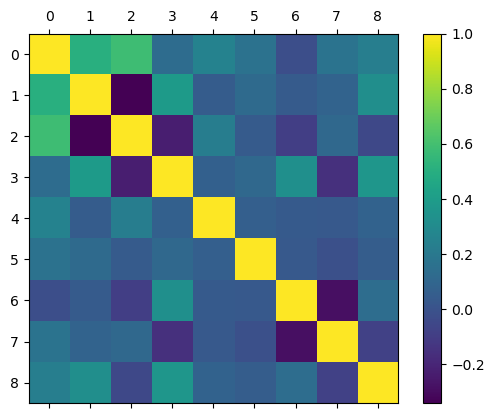

In [110]:
colnames = mietspiegel.columns.values
#print(colnames)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(mietspiegel.corr())
fig.colorbar(cax)

#set the column names as axis tick labels
xaxis = np.arange(len(colnames))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(colnames)
ax.set_yticklabels(colnames)

plt.show()

## First regression model
The rent (`miete`) has a high correlation with the living space area (`flaeche`).

<Axes: xlabel='flaeche', ylabel='miete'>

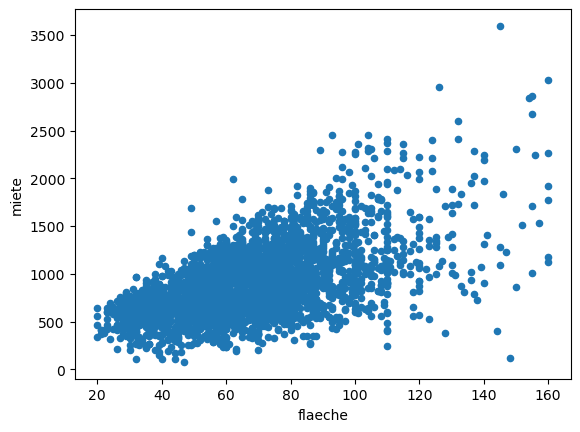

In [111]:
mietspiegel.plot.scatter(x="flaeche", y="miete")

In [112]:
# Create linear regression object
regr1 = linear_model.LinearRegression()

#extract the variables that we need from the dataset
y = mietspiegel.miete.values
x = mietspiegel.flaeche.values

# they currently have the shape (3059,) but we need (3059,1), see https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit
print(y.shape)
len = x.size
x = x.reshape(len, 1)
y = y.reshape(len, 1)
print(y.shape)

# We fit a linear regression model
regr1.fit(x, y)

# The regression coefficient
print("Coefficients: \n", regr1.coef_)
print("Intercept: \n", regr1.intercept_)


(3082,)
(3082, 1)
Coefficients: 
 [[9.40185535]]
Intercept: 
 [262.45478219]


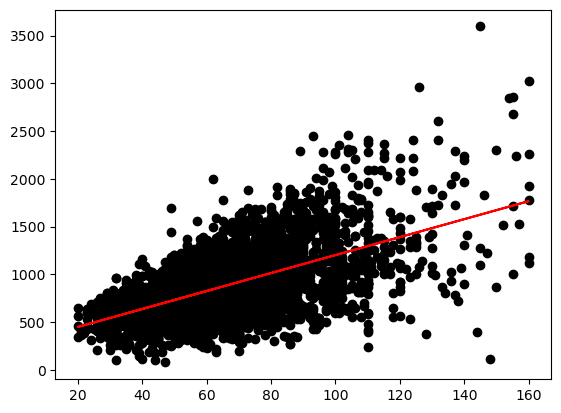

In [114]:
pred = regr1.predict(x)
plt.scatter(x, y, color="black")
plt.plot(x, pred, color="red")
plt.show()

# Linear regression using the statsmodel library
We see that the interface to the regression model with scikit learn is very limited. This is not surprising, given that scikit learn is a library primarily used for machine learning application. If more insights are needed into regression models -- indeed, linear regression is a very powerful tool to understand data and conduct exploratory data analysis -- you can use the statsmodel library. 

Further learning resources using the statsmodel library with python can be found in an [online book by the Simon Fraser University](https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/09_regression.html).

In [139]:
x2 = sm.add_constant(x)
regr2 = sm.OLS(y, x2)
regr2_result = regr2.fit()
regr2_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     1599.
Date:                Tue, 14 May 2024   Prob (F-statistic):          6.13e-282
Time:                        08:36:56   Log-Likelihood:                -22048.
No. Observations:                3082   AIC:                         4.410e+04
Df Residuals:                    3080   BIC:                         4.411e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        262.4548     16.796     15.626      0.000     229.522     295.388
x1             9.4019      0.235     39.982      0.000       8.941       9.863
==============================================================================
Omnibus:                      209.552   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.485
Skew:                           0.448   Prob(JB):                     8.23e-97
Kurtosis:                       4.625   Cond. No.                         215.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Analysis of residuals

One assumption of the linear regression is that the residuals are normally distributed (it is called *Homoscedasticity*, or homogeneity of variances). To check this, we can plot the distributions. 

### Exercise: Visually analyzing the residuals
1. Use a histogram to plot the residuals (hint: you can access them using `regr2_result.resid`.
2. Use a boxplot to visualize the residuals. Are they normally distributed?
3. Now, use a quantile-quantile (QQ-plot) to compare the distribution of the residuals with the normal distribution. 

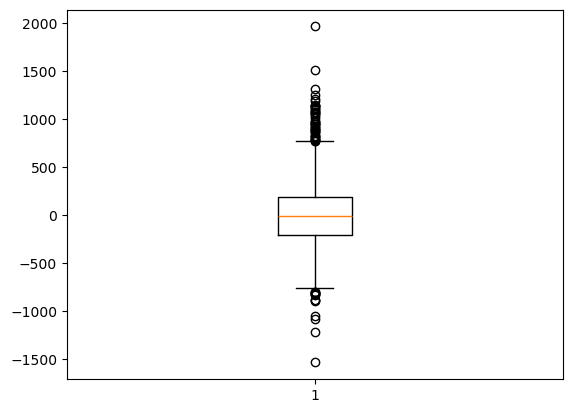

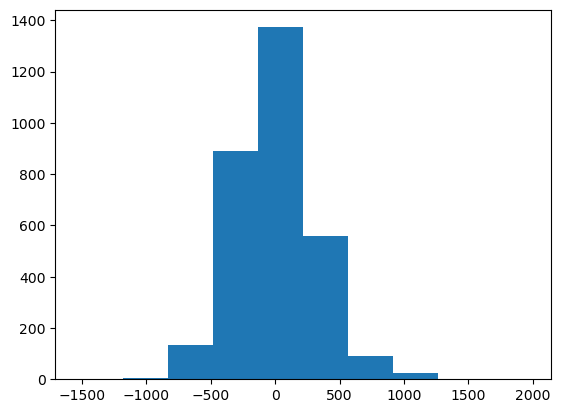

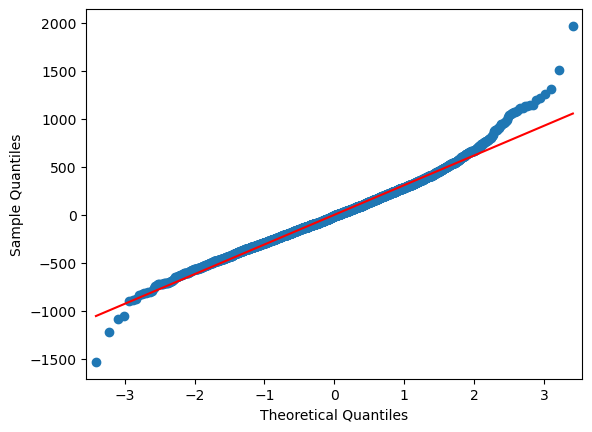

In [28]:
# using the histogram
plt.hist(regr2_result.resid)
plt.show()

#using the boxplot
plt.boxplot(regr2_result.resid)
plt.show()

#using a QQ plot
sm.qqplot(regr2_result.resid, line='s');


## Multinomial linear regression

We want to further improve the model and add further independent variables. We start with a dummy `glage` variable encoding a better exposure of the object.

In [176]:
mietspiegel['glage'] = np.where(mietspiegel['lage'] == 1, 0, 1)

x3 = mietspiegel[['flaeche', 'glage']]
x3 = sm.add_constant(x3) # we add a column for the intercept/constant

regr3 = sm.OLS(y, x3)
regr3_result = regr3.fit()
regr3_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     825.2
Date:                Tue, 14 May 2024   Prob (F-statistic):          1.10e-287
Time:                        09:03:33   Log-Likelihood:                -22031.
No. Observations:                3082   AIC:                         4.407e+04
Df Residuals:                    3079   BIC:                         4.409e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        243.8156     17.005     14.338      0.000     210.474     277.157
flaeche        9.2669      0.235     39.432      0.000       8.806       9.728
glage         66.3554     11.301      5.872      0.000      44.198      88.513
==============================================================================
Omnibus:                      185.132   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              400.453
Skew:                           0.393   Prob(JB):                     1.10e-87
Kurtosis:                       4.582   Cond. No.                         222.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

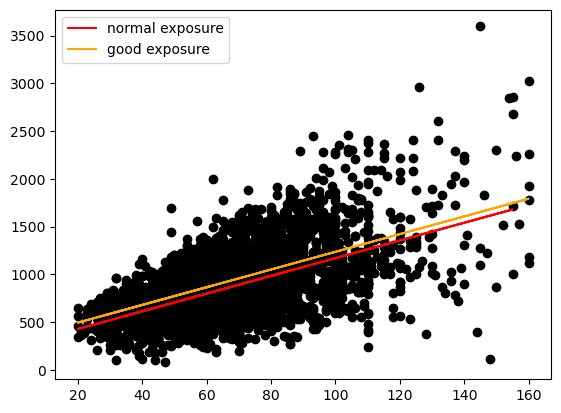

In [179]:
pred = regr3_result.predict(x3)

plt.scatter(x, y, color="black")

plt.plot(x3['flaeche'].loc[x3['glage']==0], 
         pred[x3['glage']==0], 
         color='red', 
         label='normal exposure')
plt.plot(x3['flaeche'].loc[x3['glage']==1], 
         pred[x3['glage']==1], 
         color='orange', 
         label='good exposure')
plt.legend()
plt.show()

# Use a dummy variable with three categories
For more categories, we can use the build-in function of pandas to do the encoding

In [173]:
#x3 = mietspiegel[["flaeche", "lage"]]
dlage = pd.get_dummies(mietspiegel.lage, # the variable to be encoded
                       prefix="dlage",   #prefix of the name of the dummy variables
                       drop_first=True,  #remove the first value of the dummy to avoid perfect colinearity
                       dtype=float)      #dummy should be numeric, not boolean

# we need to add the two data structures together 
x4 = pd.concat([mietspiegel["flaeche"].to_frame(), #when selecting a single column out of a dataframe, a series object will be returned
                dlage[["dlage_2", "dlage_3"]]], #this is a data frame
               axis=1)

print(type(x4)) #the result is now a dataframe

x4 = sm.add_constant(x4) # we add a column for the intercept
#print(x4)

regr4 = sm.OLS(y, x4)
regr4_result = regr4.fit()
regr4_result.summary()

#sm.qqplot(model2_result.resid, line='s');
#plt.show()


<class 'pandas.core.frame.DataFrame'>


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     566.0
Date:                Tue, 14 May 2024   Prob (F-statistic):          5.97e-293
Time:                        09:01:32   Log-Likelihood:                -22016.
No. Observations:                3082   AIC:                         4.404e+04
Df Residuals:                    3078   BIC:                         4.406e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        249.7690     16.955     14.732      0.000     216.525     283.013
flaeche        9.1759      0.234     39.142      0.000       8.716       9.636
dlage_2       54.6078     11.439      4.774      0.000      32.179      77.037
dlage_3      255.6596     35.610      7.180      0.000     185.838     325.481
==============================================================================
Omnibus:                      181.444   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              408.662
Skew:                           0.372   Prob(JB):                     1.82e-89
Kurtosis:                       4.621   Cond. No.                         461.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

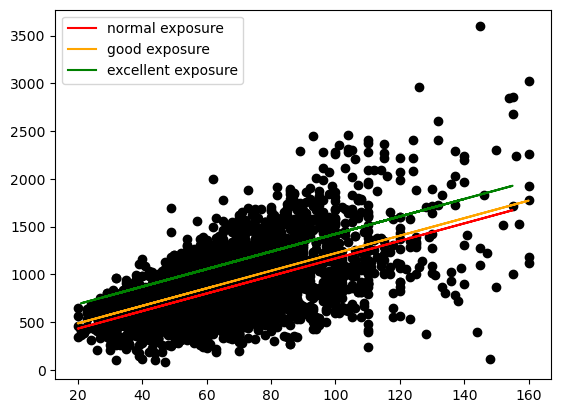

In [170]:
pred = regr4_result.predict(x4)
plt.scatter(x, y, color="black")

(x4['dlage_2']==0) & (x4['dlage_3']==0)
plt.plot(x4['flaeche'].loc[(x4['dlage_2']==0) & (x4['dlage_3']==0)], 
         pred[(x4['dlage_2']==0) & (x4['dlage_3']==0)], 
         color='red',
         label='normal exposure')
plt.plot(x4['flaeche'].loc[(x4['dlage_2']==1) & (x4['dlage_3']==0)], 
         pred[(x4['dlage_2']==1) & (x4['dlage_3']==0)], 
         color='orange',
         label='good exposure')
plt.plot(x4['flaeche'].loc[(x4['dlage_2']==0) & (x4['dlage_3']==1)], 
         pred[(x4['dlage_2']==0) & (x4['dlage_3']==1)], 
         color='green',
         label='excellent exposure')
plt.legend()
plt.show()